In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

# Problem 1

In [59]:
training_set = np.array([[0,3],[1,2],[2,1],[3,0]])

In [60]:
print(training_set)

[[0 3]
 [1 2]
 [2 1]
 [3 0]]


In [65]:
def calc_e(ts, w = [1,1]):
    es = []
    for s in ts:
        x0 = s[0]
        x1 = s[1]
        w0 = w[0]
        w1 = w[1]
        es.append(((x0 - 2*x1) - (x0*w0 + x1*w1))**2)

    return((1/4)*sum(es))

In [66]:
def update_weights(ts, w = [1,1]):
    w0s = []
    w1s = []
    w0 = w[0]
    w1 = w[1]
    for s in ts:
        x0 = s[0]
        x1 = s[1]
        w0s.append(2*x0*(2*x1 - x0 + x0*w0 + x1*w1))
        w1s.append(2*x1*(2*x1 - x0 + x0*w0 + x1*w1))
    
    w0 = w[0] - (1/10)* (1/4)*sum(w0s)
    w1 = w[1] - (1/10) * (1/4)*sum(w1s)
    return([w0,w1])

In [67]:
e = calc_e(training_set)
w = update_weights(training_set)
plot_e = [e]
steps = [0]
plot_w0 = [w[0]]
plot_w1 = [w[1]]

In [68]:
c = 0
while abs(e) > 0.01:
    c+=1
    steps.append(c)
    
    e = calc_e(training_set, w)
    plot_e.append(e)
    
    w = update_weights(training_set, w)
    plot_w0.append(w[0])
    plot_w1.append(w[1])

In [69]:
c

6

In [70]:
e

0.002746582051500002

In [71]:
w

[0.9882814, -1.9882811]

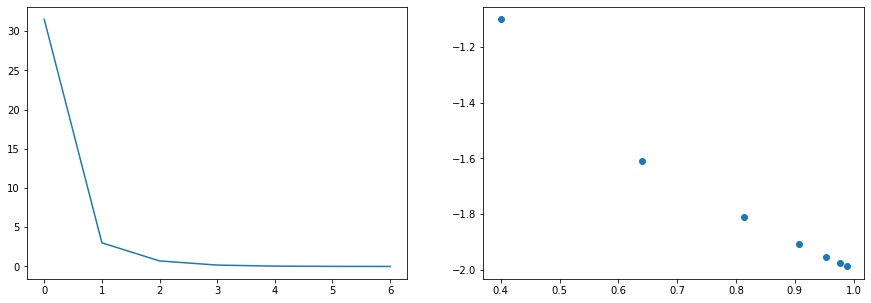

In [74]:
fig, (ax0,ax1) = plt.subplots(ncols=2, nrows = 1, figsize = [15,5])
ax0.plot(steps, plot_e)
ax1.scatter(plot_w0, plot_w1)